# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">  PUBLIC BUS TRANSPORT ANALYSIS - Tijani Salihu</p>

### Introduction About the Data :

**The dataset** The goal is to Analyzed Public Bus Transport of a given cities in Australia (Adelaide Metropolitan Area [Lat: -34.3862 to -35.3655, Lon: 138.4126 to 139.1089]).

There are 6 variables present in the dataset

* `RouteID` : A unique value representing a specific public transport route. For example: ‘M44’ or ‘GAWC’.
* `TripID` : A unique identifier of trips.
* `StopID` : A unique identifier of stops in the public transport network.
* `WeekBeginning` : A date representing the first day of any given week’.
* `StopName` : The name of the given stop. For example: ‘Stop 1 Goodwood Road’.
* `NumberOfBoardings` : A count of all boardings, regardless of ticket type, that has occurred at this stop for the named trip over the previous week.


Project Objective:
* `Insight`: In this notebook,i have explored how people are travelling from different stops in Adelaide Metropolitan area and the rate at which passengers on each bus route are increasing.

Dataset Source Link :
[https://www.kaggle.com/datasets/rednivrug/unisys/data?select=Public+Transport+Boarding+Summary+by+Route%2C+Trip%2C+Stop+and+Week+of+Year.doc)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Load in the Dataset</p>

In [2]:
df = pd.read_csv("20140711.csv")
df.head(10)

C:\Users\PASCAL\AppData\Local\Temp\ipykernel_24012\1700442388.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("20140711.csv")


TripID RouteID  StopID                    StopName        WeekBeginning  \
0   23631     100   14156                181 Cross Rd  2013-06-30 00:00:00   
1   23631     100   14144                177 Cross Rd  2013-06-30 00:00:00   
2   23632     100   14132                175 Cross Rd  2013-06-30 00:00:00   
3   23633     100   12266  Zone A Arndale Interchange  2013-06-30 00:00:00   
4   23633     100   14147                178 Cross Rd  2013-06-30 00:00:00   
5   23634     100   13907               9A  Marion Rd  2013-06-30 00:00:00   
6   23634     100   14132                175 Cross Rd  2013-06-30 00:00:00   
7   23634     100   13335            9A  Holbrooks Rd  2013-06-30 00:00:00   
8   23634     100   13875                9  Marion Rd  2013-06-30 00:00:00   
9   23634     100   13045            206 Holbrooks Rd  2013-06-30 00:00:00   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1  
5                  1  
6                  1  
7                  1  
8                  1  
9                  1

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Duplicate In Dataset</p>

In [3]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
10857229    False
10857230    False
10857231    False
10857232    False
10857233    False
Length: 10857234, dtype: bool

In [4]:
df.dtypes

TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Check Missing Value in the Dataset</p>

In [5]:
df.isnull()

TripID  RouteID  StopID  StopName  WeekBeginning  NumberOfBoardings
0          False    False   False     False          False              False
1          False    False   False     False          False              False
2          False    False   False     False          False              False
3          False    False   False     False          False              False
4          False    False   False     False          False              False
...          ...      ...     ...       ...            ...                ...
10857229   False    False   False     False          False              False
10857230   False    False   False     False          False              False
10857231   False    False   False     False          False              False
10857232   False    False   False     False          False              False
10857233   False    False   False     False          False              False

[10857234 rows x 6 columns]

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Descriptive Analysis of the Dataset</p>

In [6]:
df.describe()

TripID        StopID  NumberOfBoardings
count  1.085723e+07  1.085723e+07       1.085723e+07
mean   2.952100e+04  1.366132e+04       4.743737e+00
std    1.960938e+04  1.971760e+03       9.382286e+00
min    7.900000e+01  1.000100e+04       1.000000e+00
25%    1.191700e+04  1.231100e+04       1.000000e+00
50%    2.747900e+04  1.334600e+04       2.000000e+00
75%    4.885800e+04  1.491600e+04       4.000000e+00
max    6.553500e+04  1.871500e+04       9.770000e+02

### The Total Number of Rows and Columns

In [7]:
df.shape

(10857234, 6)

### Drop duplicates and Check data types of columns

In [8]:
df = df.drop_duplicates()
print(df.dtypes)

TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


### Handle mixed data types
#### 'RouteID' column has mixed types, convert it to numeric

In [9]:
df['RouteID'] = pd.to_numeric(df['RouteID'], errors='coerce')
print("Handle mixed data types")
print(df.shape)

Handle mixed data types
(10857234, 6)


In [10]:
df.tail()

TripID  RouteID  StopID        StopName        WeekBeginning  \
10857229   13346      NaN   14629    21 Cashel St  2014-07-06 00:00:00   
10857230   13346      NaN   14708    22 Cashel St  2014-07-06 00:00:00   
10857231   13346      NaN   13709  2 Greenhill Rd  2014-07-06 00:00:00   
10857232   13346      NaN   14029      10 East Av  2014-07-06 00:00:00   
10857233   13346      NaN   13824     6 Leader St  2014-07-06 00:00:00   

          NumberOfBoardings  
10857229                  1  
10857230                  3  
10857231                  1  
10857232                  1  
10857233                  1

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Handle missing values of the Dataset</p>

In [11]:
df.isnull().sum()

TripID                     0
RouteID              4442328
StopID                     0
StopName                   0
WeekBeginning              0
NumberOfBoardings          0
dtype: int64


### Drop rows with missing values or fill them based on your project requirements

In [12]:
new_df = df.dropna()
print("\nHandle missing values")
print(new_df.shape)


Handle missing values
(6414906, 6)


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Dataset Conversion to Real Time Data</p>

### Convert 'WeekBeginning' column to datetime format

In [13]:
new_df['WeekBeginning'] = pd.to_datetime(new_df['WeekBeginning'], errors='coerce')
print("\nConvert 'WeekBeginning' column to datetime format")
print(new_df['WeekBeginning'].head())


Convert 'WeekBeginning' column to datetime format
0   2013-06-30
1   2013-06-30
2   2013-06-30
3   2013-06-30
4   2013-06-30
Name: WeekBeginning, dtype: datetime64[ns]


C:\Users\PASCAL\AppData\Local\Temp\ipykernel_24012\3089200476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['WeekBeginning'] = pd.to_datetime(new_df['WeekBeginning'], errors='coerce')


### Clean 'StopName' column
#### Remove leading and trailing whitespaces

In [14]:
new_df['StopName'] = new_df['StopName'].str.strip()
print("\nClean 'StopName' column")
print(new_df['StopName'].head())


Clean 'StopName' column
0                  181 Cross Rd
1                  177 Cross Rd
2                  175 Cross Rd
3    Zone A Arndale Interchange
4                  178 Cross Rd
Name: StopName, dtype: object


C:\Users\PASCAL\AppData\Local\Temp\ipykernel_24012\872880958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['StopName'] = new_df['StopName'].str.strip()


In [15]:
new_df.head()

TripID  RouteID  StopID                    StopName WeekBeginning  \
0   23631    100.0   14156                181 Cross Rd    2013-06-30   
1   23631    100.0   14144                177 Cross Rd    2013-06-30   
2   23632    100.0   14132                175 Cross Rd    2013-06-30   
3   23633    100.0   12266  Zone A Arndale Interchange    2013-06-30   
4   23633    100.0   14147                178 Cross Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Unique values for each column in the DataFrame</p>

In [16]:
print(df.nunique())

TripID               39282
RouteID                323
StopID                7397
StopName              4165
WeekBeginning           54
NumberOfBoardings      400
dtype: int64


In [17]:
new_df.shape
new_df.columns
new_df.head(5)

TripID  RouteID  StopID                    StopName WeekBeginning  \
0   23631    100.0   14156                181 Cross Rd    2013-06-30   
1   23631    100.0   14144                177 Cross Rd    2013-06-30   
2   23632    100.0   14132                175 Cross Rd    2013-06-30   
3   23633    100.0   12266  Zone A Arndale Interchange    2013-06-30   
4   23633    100.0   14147                178 Cross Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1

In [18]:
new_df.isnull().sum()

TripID               0
RouteID              0
StopID               0
StopName             0
WeekBeginning        0
NumberOfBoardings    0
dtype: int64

### different type of Unique Data in the dataset

In [19]:
new_df['WeekBeginning'].unique()

<DatetimeArray>
['2013-06-30 00:00:00', '2013-07-07 00:00:00', '2013-07-14 00:00:00',
 '2013-07-21 00:00:00', '2013-07-28 00:00:00', '2013-08-04 00:00:00',
 '2013-08-11 00:00:00', '2013-08-18 00:00:00', '2013-08-25 00:00:00',
 '2013-09-01 00:00:00', '2013-09-08 00:00:00', '2013-09-15 00:00:00',
 '2013-09-22 00:00:00', '2013-09-29 00:00:00', '2013-10-06 00:00:00',
 '2013-10-13 00:00:00', '2013-10-20 00:00:00', '2013-10-27 00:00:00',
 '2013-11-03 00:00:00', '2013-11-10 00:00:00', '2013-11-17 00:00:00',
 '2013-11-24 00:00:00', '2013-12-01 00:00:00', '2013-12-08 00:00:00',
 '2013-12-15 00:00:00', '2013-12-22 00:00:00', '2013-12-29 00:00:00',
 '2014-01-05 00:00:00', '2014-01-12 00:00:00', '2014-01-19 00:00:00',
 '2014-01-26 00:00:00', '2014-02-02 00:00:00', '2014-02-09 00:00:00',
 '2014-02-16 00:00:00', '2014-02-23 00:00:00', '2014-03-02 00:00:00',
 '2014-03-09 00:00:00', '2014-03-16 00:00:00', '2014-03-23 00:00:00',
 '2014-03-30 00:00:00', '2014-04-06 00:00:00', '2014-04-13 00:00:00',
 '20

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Dataset Visualization </p>

<Axes: xlabel='TripID'>

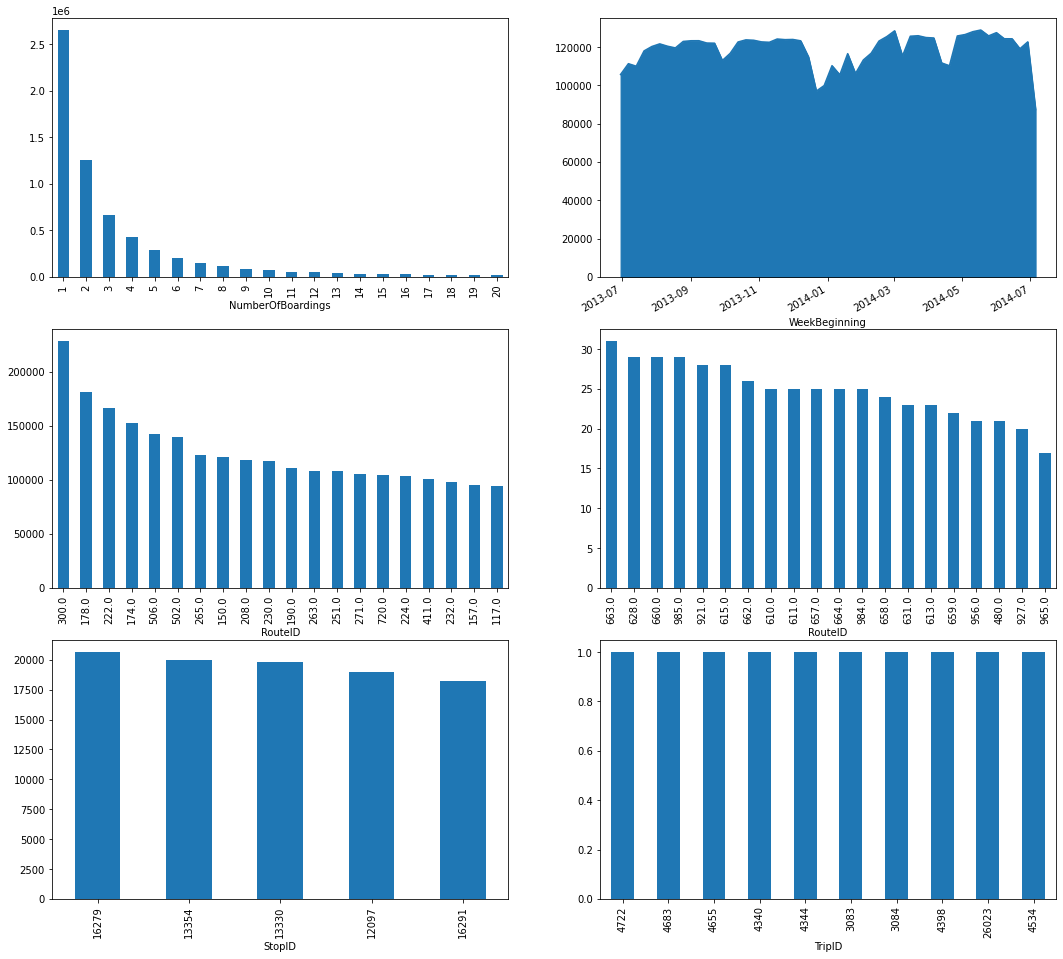

In [20]:
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(3,2,figsize=(18,18))
new_df['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])
new_df['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])
new_df['RouteID'].value_counts().head(20).plot.bar(ax=axrr[1][0])
new_df['RouteID'].value_counts().tail(20).plot.bar(ax=axrr[1][1])
new_df['StopID'].value_counts().head(5).plot.bar(ax=axrr[2][0])
new_df['TripID'].value_counts().tail(10).plot.bar(ax=axrr[2][1])

In [21]:
new_df.head(10)

TripID  RouteID  StopID                    StopName WeekBeginning  \
0   23631    100.0   14156                181 Cross Rd    2013-06-30   
1   23631    100.0   14144                177 Cross Rd    2013-06-30   
2   23632    100.0   14132                175 Cross Rd    2013-06-30   
3   23633    100.0   12266  Zone A Arndale Interchange    2013-06-30   
4   23633    100.0   14147                178 Cross Rd    2013-06-30   
5   23634    100.0   13907               9A  Marion Rd    2013-06-30   
6   23634    100.0   14132                175 Cross Rd    2013-06-30   
7   23634    100.0   13335            9A  Holbrooks Rd    2013-06-30   
8   23634    100.0   13875                9  Marion Rd    2013-06-30   
9   23634    100.0   13045            206 Holbrooks Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1  
5                  1  
6                  1  
7                  1  
8                  1  
9                  1

In [22]:
new_df.shape

(6414906, 6)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Dataset Info</p>

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6414906 entries, 0 to 7770689
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TripID             int64         
 1   RouteID            float64       
 2   StopID             int64         
 3   StopName           object        
 4   WeekBeginning      datetime64[ns]
 5   NumberOfBoardings  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 342.6+ MB


### Columns of Dataset

In [24]:
new_df.columns

Index(['TripID', 'RouteID', 'StopID', 'StopName', 'WeekBeginning',
       'NumberOfBoardings'],
      dtype='object')

### TripID Counted

In [25]:
trip=new_df.TripID.value_counts()
trip

TripID
57020    2819
57018    2741
27478    2733
57041    2718
57029    2691
         ... 
3083        1
3084        1
4398        1
26023       1
4534        1
Name: count, Length: 23926, dtype: int64

### RoutID Counted

In [26]:
new_df.RouteID.value_counts()

RouteID
300.0    228373
178.0    181303
222.0    166623
174.0    152420
506.0    142216
          ...  
659.0        22
956.0        21
480.0        21
927.0        20
965.0        17
Name: count, Length: 323, dtype: int64

### StopID Counted

In [27]:
new_df.StopID.value_counts()

StopID
16279    20644
13354    20004
13330    19855
12097    18967
16291    18204
         ...  
17421        1
12798        1
12733        1
12791        1
16457        1
Name: count, Length: 6718, dtype: int64

### WeekBeginning Counted

In [28]:
new_df.WeekBeginning.value_counts()

WeekBeginning
2014-05-18    128858
2014-03-02    128436
2014-05-11    127997
2014-06-01    127479
2014-05-04    126495
2014-03-23    125873
2014-05-25    125794
2014-04-27    125742
2014-03-16    125616
2014-02-23    125425
2014-03-30    124927
2014-04-06    124694
2014-06-08    124297
2014-06-15    124272
2013-11-17    124161
2013-12-01    123927
2013-11-24    123831
2013-10-20    123717
2013-10-27    123512
2013-09-08    123268
2013-09-01    123252
2013-12-08    123217
2014-02-16    123091
2013-08-25    122893
2014-06-29    122665
2013-11-03    122657
2013-10-13    122593
2013-11-10    122453
2013-09-15    122068
2013-09-22    121976
2013-08-04    121625
2013-08-11    120393
2013-07-28    120250
2013-08-18    119510
2014-06-22    119075
2013-07-21    117943
2014-02-09    116727
2013-10-06    116678
2014-01-19    116500
2014-03-09    115272
2013-12-15    114795
2014-02-02    113205
2013-09-29    112947
2014-04-13    111662
2013-07-07    111277
2014-01-05    110247
2014-04-20    110215

### Number of Boardings Counted

In [29]:
new_df.NumberOfBoardings.value_counts()

NumberOfBoardings
1      2653854
2      1251198
3       669527
4       425683
5       286765
        ...   
367          1
567          1
483          1
290          1
449          1
Name: count, Length: 381, dtype: int64

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Dataset manipulation</p>

In [30]:
new_df['WeekBeginning'] = pd.to_datetime(new_df['WeekBeginning']).dt.date
new_df['WeekBeginning'][1]

C:\Users\PASCAL\AppData\Local\Temp\ipykernel_24012\534575909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['WeekBeginning'] = pd.to_datetime(new_df['WeekBeginning']).dt.date


datetime.date(2013, 6, 30)

In [31]:
grouped = new_df.groupby(['StopName','WeekBeginning',]).agg({'NumberOfBoardings': ['sum', 'count','max']})
grouped

NumberOfBoardings          
                                                         sum count max
StopName                     WeekBeginning                            
1 Anzac Hwy                  2013-06-30                  520   204  44
                             2013-07-07                  416   179  28
                             2013-07-14                  420   171  38
                             2013-07-21                  370   174  28
                             2013-07-28                  466   186  41
...                                                      ...   ...  ..
Zone I Salisbury Interchange 2014-06-08                  377    67  30
                             2014-06-15                  373    65  39
                             2014-06-22                  332    62  43
                             2014-06-29                  451    65  39
                             2014-07-06                  220    41  21

[183214 rows x 3 columns]

In [32]:
st_week_grp = pd.DataFrame(grouped).reset_index()
st_week_grp1 = pd.DataFrame(st_week_grp.groupby('StopName')["WeekBeginning"].count()).reset_index()
st_week_grp1.head(20)

StopName  WeekBeginning
0               1 Anzac Hwy             54
1              1 Bartels Rd              1
2              1 Botanic Rd             54
3                1 Frome Rd             54
4            1 Fullarton Rd             54
5               1 George St             54
6          1 Glen Osmond Rd             54
7         1 Henley Beach Rd             54
8           1 Kensington Rd             54
9         1 King William Rd             54
10          1 Montefiore Rd             17
11                1 Port Rd             54
12  1 Sir Donald Bradman Dr             54
13     1 Sir Edwin Smith Av             54
14               1 Unley Rd             54
15         10  Holbrooks Rd             54
16            10  Marion Rd             54
17          10  Portrush Rd             54
18             10 Anzac Hwy             54
19             10 Ashley St             54

In [33]:
stopListName = list(st_week_grp1[st_week_grp1['WeekBeginning'] == 17]['StopName'])
stopListName[1:30]

['144 Alexander St',
 '20D Daws Rd',
 '2B Greenhill Rd',
 '32B Upper Sturt Rd',
 '44A Ocean Bvd',
 '45 Burgoyne Dr',
 '60 Meadows Rd',
 '64 Cameron Rd',
 '86 Craigmore Rd',
 'School Billabong Rd / Cumberla',
 'School Brighton Rd / Elgar Rd',
 'School Coral Sea Rd / Burnley',
 'School Cumberland Ave / Oaklan',
 'School Military Rd / Toledo Av',
 'School Robertson Rd / Spruce A',
 'School Wattle Ave / Colton Ave']

In [34]:
stopListName = list(st_week_grp1[st_week_grp1['WeekBeginning'] == 54]['StopName'])
stopListName[1:30]

['1 Botanic Rd',
 '1 Frome Rd',
 '1 Fullarton Rd',
 '1 George St',
 '1 Glen Osmond Rd',
 '1 Henley Beach Rd',
 '1 Kensington Rd',
 '1 King William Rd',
 '1 Port Rd',
 '1 Sir Donald Bradman Dr',
 '1 Sir Edwin Smith Av',
 '1 Unley Rd',
 '10  Holbrooks Rd',
 '10  Marion Rd',
 '10  Portrush Rd',
 '10 Anzac Hwy',
 '10 Ashley St',
 '10 Belair Rd',
 '10 Churchill Rd',
 '10 Fullarton Rd',
 '10 Glen Osmond Rd',
 '10 Greenhill Rd',
 '10 Harrow Tce',
 '10 Harvey Av',
 '10 Hawker St',
 '10 Kensington Rd',
 '10 Main North Rd',
 '10 North East Rd',
 '10 Payneham Rd']

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Dataset Insight</p>

### stopageName with total numbers of boarding

In [35]:
stopageName_with_boarding = new_df.groupby(['StopName']).agg({'NumberOfBoardings': ['sum']}).reset_index()

In [79]:
stopageName_with_boarding.columns = ["stopName","Total_No_of_boardings"]
stopageName_with_boarding.head()

stopName  Total_No_of_boardings
3710           X2 King William St                 392261
3504           D1 King William St                 304767
3554                 I2 North Tce                 235130
3705           X1 King William St                 224486
3828  Zone F Paradise Interchange                 211899

### stopage with most number of boarding

In [37]:
stopageName_with_boarding = stopageName_with_boarding.sort_values("Total_No_of_boardings", ascending = False)
stopageName_with_boarding.head(10)

stopName  Total_No_of_boardings
3710           X2 King William St                 392261
3504           D1 King William St                 304767
3554                 I2 North Tce                 235130
3705           X1 King William St                 224486
3828  Zone F Paradise Interchange                 211899
3538               G3 Grenfell St                 201599
3495           C3 King William St                 192148
3690                 W1 North Tce                 189388
3515                 E2 Currie St                 170410
3511                 E1 Currie St                 165886

### most busiest stopage visualization

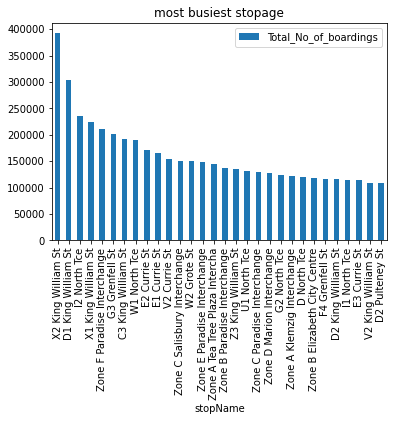

In [38]:
busiestStop = stopageName_with_boarding.head(30).plot.bar(x="stopName", y="Total_No_of_boardings", rot=90)
plt.title("most busiest stopage")
plt.legend()

### least busiest stopage visualization

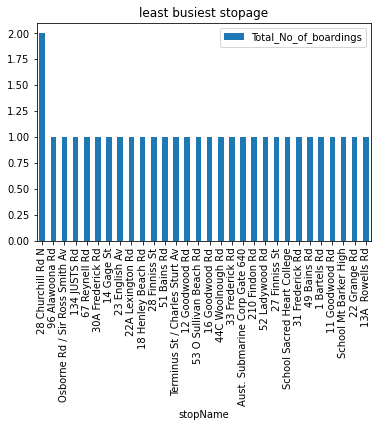

In [39]:
leastBusiestStop = stopageName_with_boarding.tail(30).plot.bar(x='stopName', y='Total_No_of_boardings', rot=90)
plt.title("least busiest stopage")
plt.legend()

### Insight visualization
#### Number of Boardings
#### Weekbeginning 
#### most busiest Route
#### least busiest Route

<Axes: title={'center': 'least Busiest Route'}, xlabel='RouteID'>

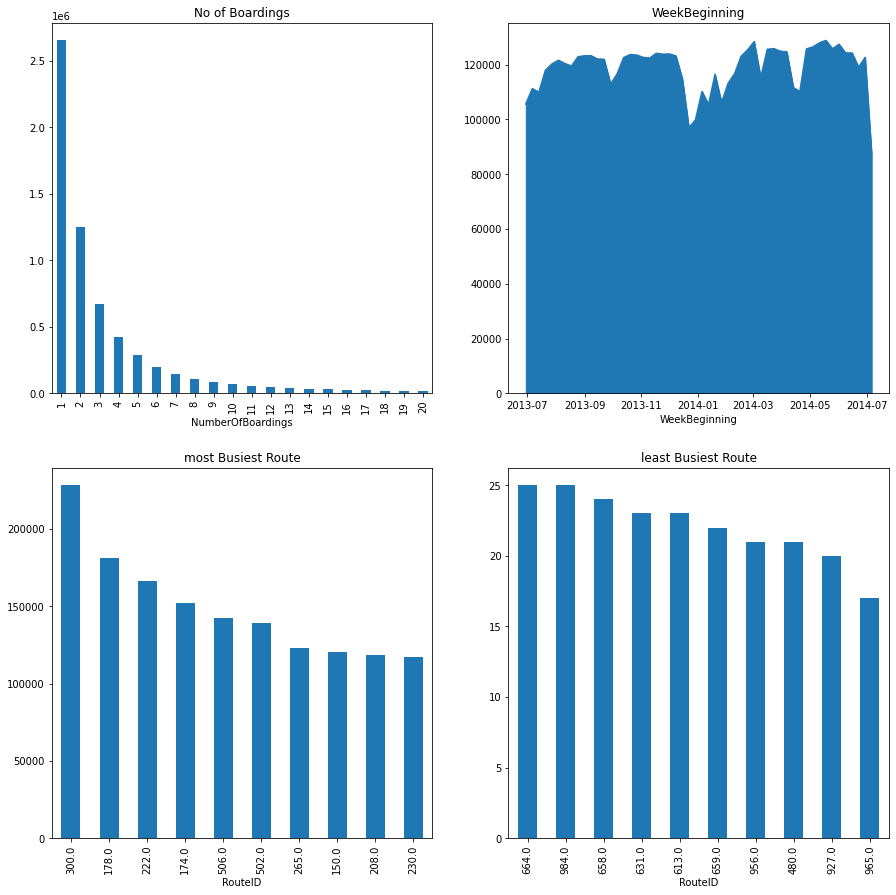

In [40]:
import matplotlib.pyplot as plt
fig,axrr=plt.subplots(2,2,figsize=(15,15))

ax=axrr[0][0]
ax.set_title("No of Boardings")
new_df['NumberOfBoardings'].value_counts().sort_index().head(20).plot.bar(ax=axrr[0][0])

ax=axrr[0][1]
ax.set_title("WeekBeginning")
new_df['WeekBeginning'].value_counts().plot.area(ax=axrr[0][1])

ax=axrr[1][0]
ax.set_title("most Busiest Route")
new_df['RouteID'].value_counts().head(10).plot.bar(ax=axrr[1][0])

ax=axrr[1][1]
ax.set_title("least Busiest Route")
new_df['RouteID'].value_counts().tail(10).plot.bar(ax=axrr[1][1])

In [41]:
new_df

TripID  RouteID  StopID                    StopName WeekBeginning  \
0         23631    100.0   14156                181 Cross Rd    2013-06-30   
1         23631    100.0   14144                177 Cross Rd    2013-06-30   
2         23632    100.0   14132                175 Cross Rd    2013-06-30   
3         23633    100.0   12266  Zone A Arndale Interchange    2013-06-30   
4         23633    100.0   14147                178 Cross Rd    2013-06-30   
...         ...      ...     ...                         ...           ...   
7770685    5608    996.0   15145        29 Shepherds Hill Rd    2014-06-29   
7770686    5608    996.0   14968                29D Sturt Rd    2014-06-29   
7770687    5608    996.0   15029       27A Shepherds Hill Rd    2014-06-29   
7770688    5608    996.0   14964   Zone A Marion Interchange    2014-06-29   
7770689    5608    996.0   14999        27 Shepherds Hill Rd    2014-06-29   

         NumberOfBoardings  
0                        1  
1                        1  
2                        1  
3                        2  
4                        1  
...                    ...  
7770685                  1  
7770686                 22  
7770687                  4  
7770688                 34  
7770689                  9  

[6414906 rows x 6 columns]

In [42]:
new_df.describe()

TripID       RouteID        StopID  NumberOfBoardings
count  6.414906e+06  6.414906e+06  6.414906e+06       6.414906e+06
mean   2.720821e+04  3.520772e+02  1.343411e+04       4.207567e+00
std    1.898503e+04  2.078052e+02  2.004087e+03       8.250148e+00
min    7.900000e+01  1.000000e+02  1.000100e+04       1.000000e+00
25%    1.111000e+04  1.900000e+02  1.206200e+04       1.000000e+00
50%    2.581800e+04  2.630000e+02  1.327500e+04       2.000000e+00
75%    4.564200e+04  5.020000e+02  1.447800e+04       4.000000e+00
max    6.551200e+04  9.960000e+02  1.871200e+04       6.480000e+02

In [43]:
from matplotlib import pyplot as plt

### Plotting the total number of dataset against TripID

<Axes: xlabel='TripID', ylabel='Count'>

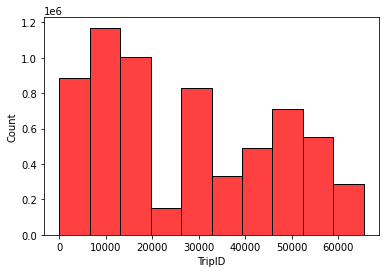

In [44]:
sns.histplot(new_df, x='TripID', bins=10, color='r')


### Plotting the total number of dataset against StopID

<Axes: xlabel='StopID', ylabel='Count'>

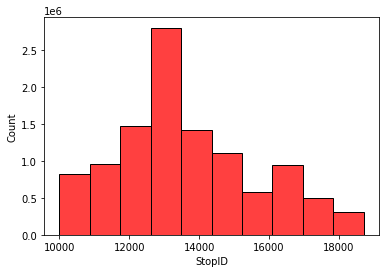

In [46]:
sns.histplot(new_df, x='StopID', bins=10, color='r')

### Plotting the total number of dataset against TripID and Number of Boarding

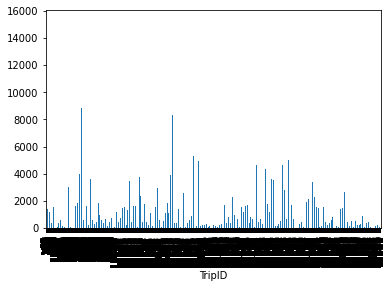

In [48]:
M=(new_df.groupby('TripID')['NumberOfBoardings']).sum()
M
M.plot.bar()
plt.show()


C:\Users\PASCAL\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\PASCAL\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\PASCAL\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\PASCAL\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\PASCAL\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\PASCAL\AppD

<Figure size 864x576 with 0 Axes>

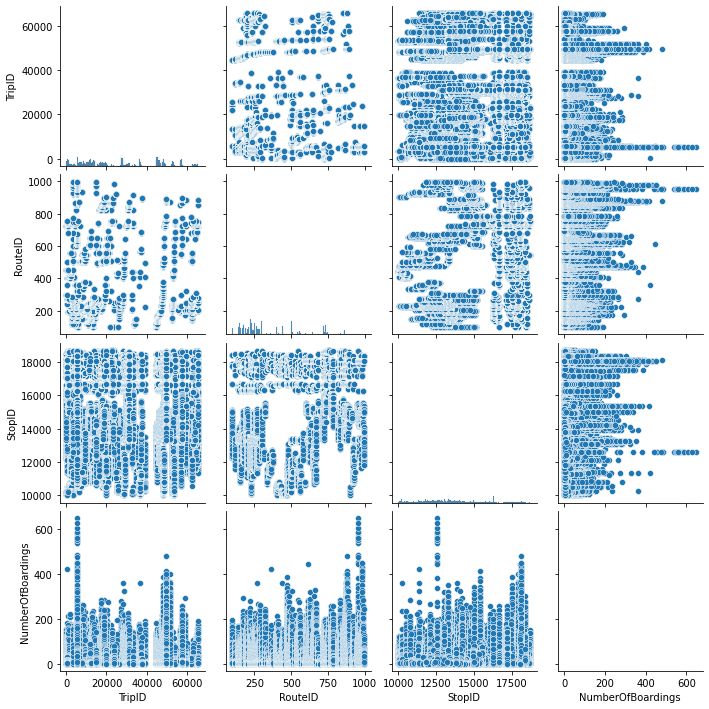

In [49]:
plt.figure(figsize=(12,8))
sns.pairplot(new_df,palette="red")


array([[<Axes: title={'center': 'TripID'}>,
        <Axes: title={'center': 'RouteID'}>],
       [<Axes: title={'center': 'StopID'}>,
        <Axes: title={'center': 'NumberOfBoardings'}>]], dtype=object)

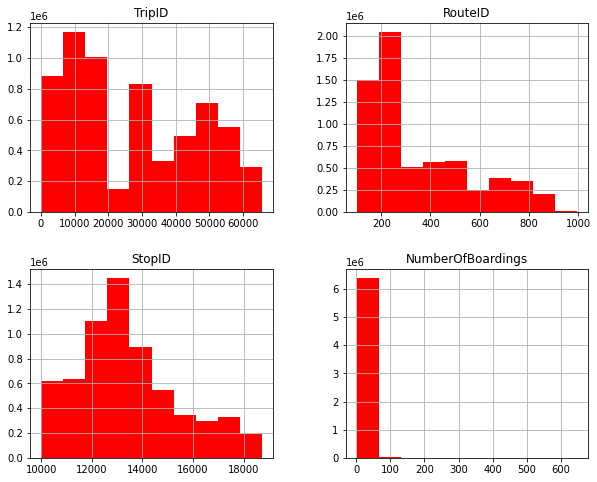

In [50]:
new_df.hist(figsize=(10,8),color='r')

In [51]:
C=new_df.groupby('StopName')['TripID'].sum().sort_values(ascending = False)
C

StopName
2 King William Rd     669123245
X2 King William St    550452641
I2 North Tce          529571260
13  Payneham Rd       528348051
G3 Grenfell St        510088782
                        ...    
16 Goodwood Rd             4824
13 Goodwood Rd             4824
12 Goodwood Rd             4824
96 Alawoona Rd             3428
84 Adams Rd                3426
Name: TripID, Length: 3840, dtype: int64

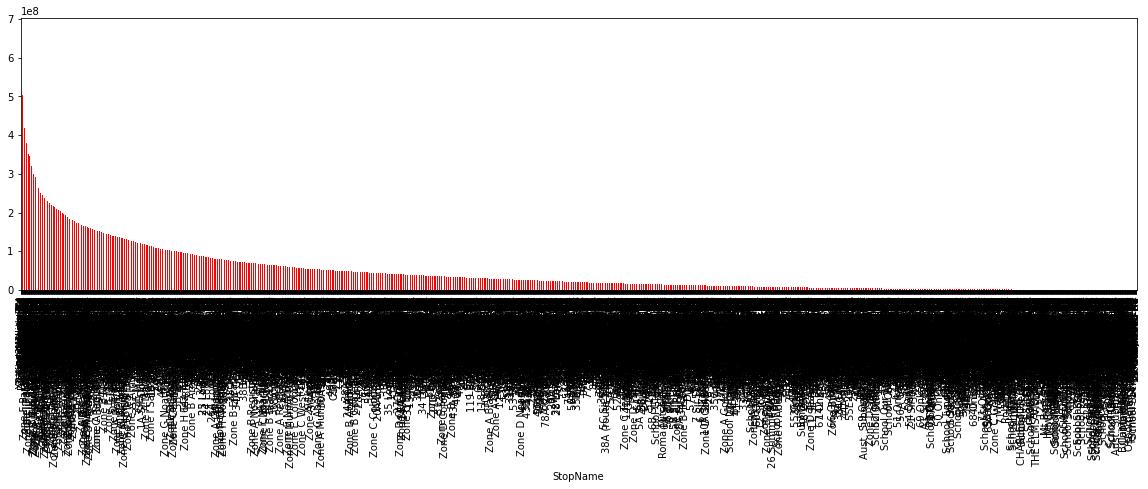

In [52]:
C.plot.bar(figsize=(20,5),color='r')
plt.show()

In [53]:
WeekBeginning = new_df.groupby(['RouteID','WeekBeginning'])[['NumberOfBoardings']].sum()
WeekBeginning

NumberOfBoardings
RouteID WeekBeginning                   
100.0   2013-06-30                  6998
        2013-07-07                  3647
        2013-07-14                  3528
        2013-07-21                  6901
        2013-07-28                  7338
...                                  ...
996.0   2014-06-01                   156
        2014-06-08                    38
        2014-06-15                   130
        2014-06-22                   107
        2014-06-29                   134

[13000 rows x 1 columns]

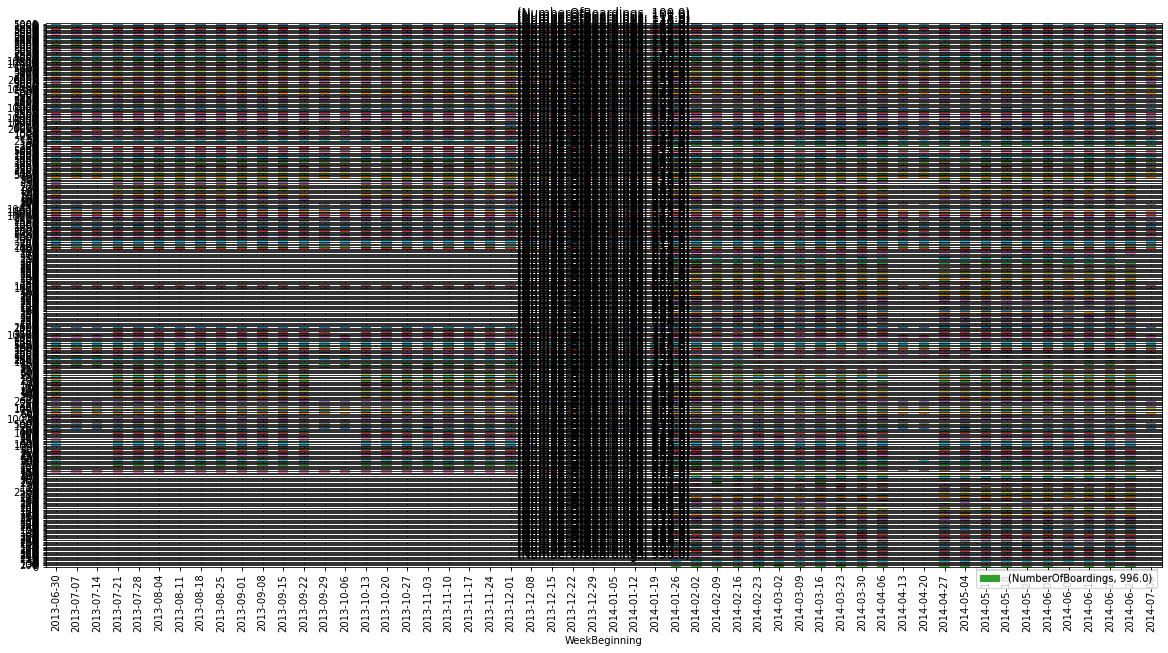

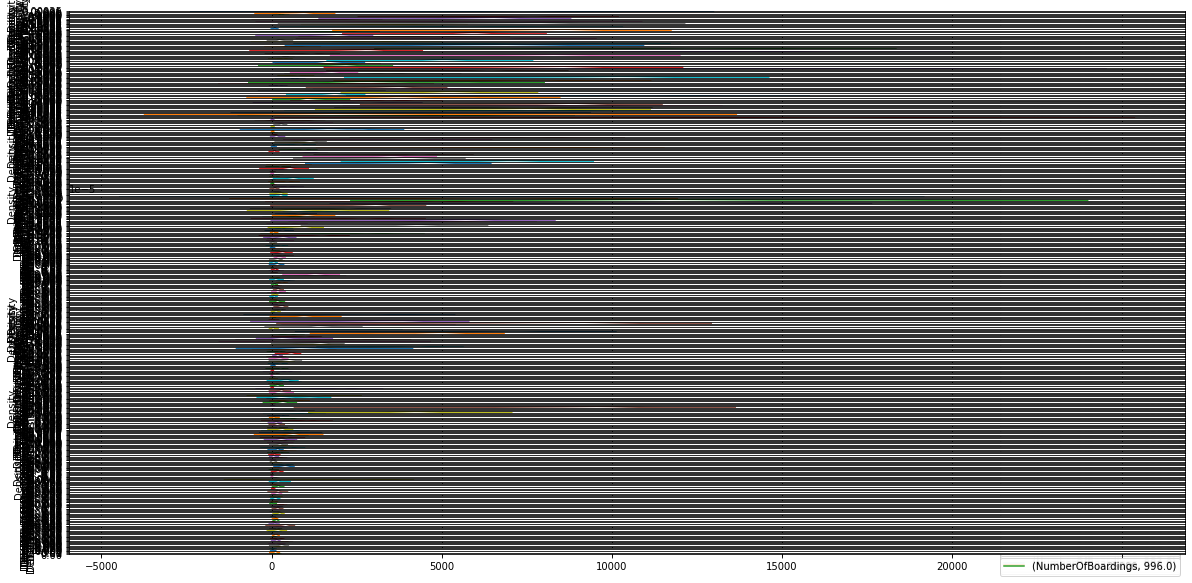

In [54]:
WeekBeginning.unstack(level=0).plot(kind='bar',subplots=True,figsize=(20,10))
WeekBeginning.unstack(level=0).plot(kind='kde',subplots=True,figsize=(20,10))
plt.show()

In [56]:
new_df.corr

<bound method DataFrame.corr of          TripID  RouteID  StopID                    StopName WeekBeginning  \
0         23631    100.0   14156                181 Cross Rd    2013-06-30   
1         23631    100.0   14144                177 Cross Rd    2013-06-30   
2         23632    100.0   14132                175 Cross Rd    2013-06-30   
3         23633    100.0   12266  Zone A Arndale Interchange    2013-06-30   
4         23633    100.0   14147                178 Cross Rd    2013-06-30   
...         ...      ...     ...                         ...           ...   
7770685    5608    996.0   15145        29 Shepherds Hill Rd    2014-06-29   
7770686    5608    996.0   14968                29D Sturt Rd    2014-06-29   
7770687    5608    996.0   15029       27A Shepherds Hill Rd    2014-06-29   
7770688    5608    996.0   14964   Zone A Marion Interchange    2014-06-29   
7770689    5608    996.0   14999        27 Shepherds Hill Rd    2014-06-29   

         NumberOfBoardings  
0 

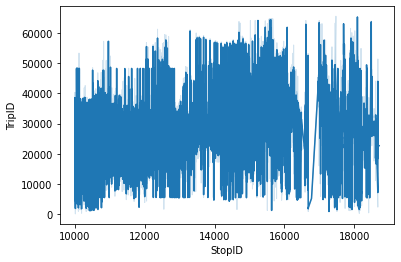

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'StopID' and 'TripID' are columns in your DataFrame 'new_df'
sns.lineplot(x="StopID", y="TripID", data=new_df, palette=None)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

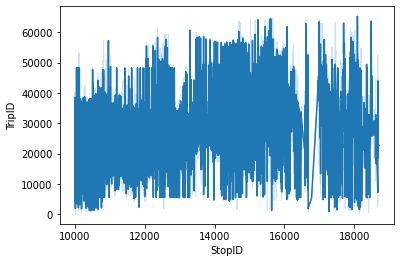

In [63]:
sns.lineplot(x="StopID", y="TripID", data=new_df,palette=None)
plt.show

C:\Users\PASCAL\AppData\Local\Temp\ipykernel_24012\929427527.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="StopID", y="TripID", data=new_df,palette='red')


<function matplotlib.pyplot.show(close=None, block=None)>

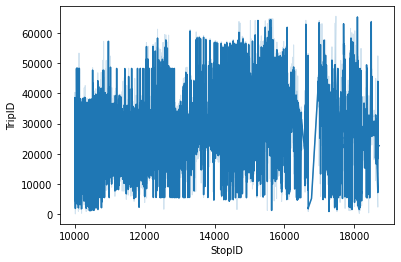

In [64]:
sns.lineplot(x="StopID", y="TripID", data=new_df,palette='red')
plt.show

In [66]:
# adapted from https://plot.ly/python/plotly-express/
import plotly.express as px
gapminder = px.data.gapminder()
fig = px.scatter(gapminder.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

TripID  RouteID  StopID                    StopName WeekBeginning  \
0   23631    100.0   14156                181 Cross Rd    2013-06-30   
1   23631    100.0   14144                177 Cross Rd    2013-06-30   
2   23632    100.0   14132                175 Cross Rd    2013-06-30   
3   23633    100.0   12266  Zone A Arndale Interchange    2013-06-30   
4   23633    100.0   14147                178 Cross Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1

In [1]:
pip install --upgrade pandoc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
